# Computer Assignment 2
## Parmis Vaghef Davari 810100260
## HMM

### Problem Description:
We have a dataset consisting of 3000 voices from 6 different speakers. Each of them speak some letter between 0 and 9. We ought to train the hmm model so that we could predict the speaker or the digit they are saying!

### Goal: Train this dataset with both hmm library and from scratch. To learn the process, and compare the results based on some functions.

## PreProcessing

### Q1: Is Segmentation appropriate for this dataset? 
Segmentation best works with datasets that share a common variable or a common property.

### Q2

1. **MFCC**: Stands for Mel Frequency Cepstral Coefficients. It is a technique wildly used in speech and audio processing. MFCCS are used to convert audio in the time domain into the freequency domain and to represent the spectral characteristics of sound in a way that is well-suited for various machine learning tasks such as speech recognition. MFCC is said to have poor robustness to noise signals.

2. **Zero Crossing Rate**: Measure of how frequntly a signal changes its sign. It is used for signal processing in various purposes such as speech recognition. In the context of discrete-time signals, a zero crossing is said to occur if successive samples have different algebraic signs.

3. **Mel-Spectrome**: Is a representation of the short-term power spectrum of a sound. It’s based on a linear cosine transform of a log power spectrum, but with a twist: the frequency scale used is the mel scale.

4. **Chroma Features**: Is a powerfull for analyzing music. Chroma features capture the harmonic and melodic charactristics of music, while being robust to changes in timbre and instrumentation.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from matplotlib import cm
import os
from python_speech_features import mfcc
import librosa
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
from sklearn import metrics
  

In [2]:
def view_mfcc_plots(mfcc_data, speaker):
    plt.matshow(mfcc_data[0].T, cmap='Spectral', origin='lower', aspect= 'auto')
    plt.title(f'MFCC for {speaker}')
    plt.ylabel('Coefficients')
    plt.xlabel('Time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


In [3]:
from collections import defaultdict
NUM_OF_SPEAKERS = 300
AVG_VOICE_LENGTH = 15
PATH_FILE = "D:/Universite/Term 6/Artificial Intelligence/CAs/CA2/recordings"

speakers = ['george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler']
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
file_speaker_mfcc_vals = {}
file_number_mfcc_vals = {}

def cut_mfccs(min_len, mfcc):
    return mfcc[:min_len, :]

for filename in os.listdir(PATH_FILE):
    if filename.endswith('.wav'):
        (rate, sig) = wav.read(PATH_FILE  + '/' + filename)
        sig = sig[sig != 0]
        mfcc_feat = mfcc(sig, rate)
        mfcc_feat = np.array(cut_mfccs(13, mfcc_feat))
        speaker = filename.split('_')[1]
        number = int(filename.split('_')[0])
            
        if speaker in file_speaker_mfcc_vals.keys():
            file_speaker_mfcc_vals[speaker].append(mfcc_feat)
        else:
            file_speaker_mfcc_vals[speaker] = [mfcc_feat]
            
        if number in file_number_mfcc_vals.keys():
            file_number_mfcc_vals[number].append(mfcc_feat)
        else:
            file_number_mfcc_vals[number] = [mfcc_feat]
            


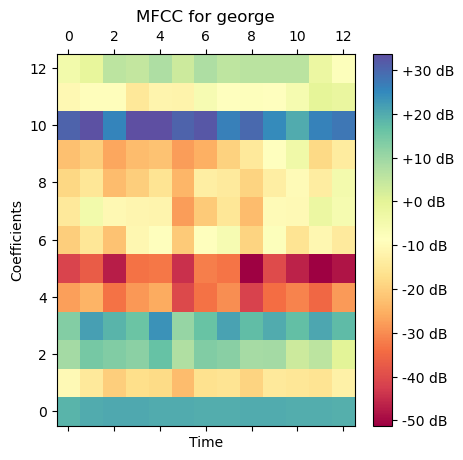

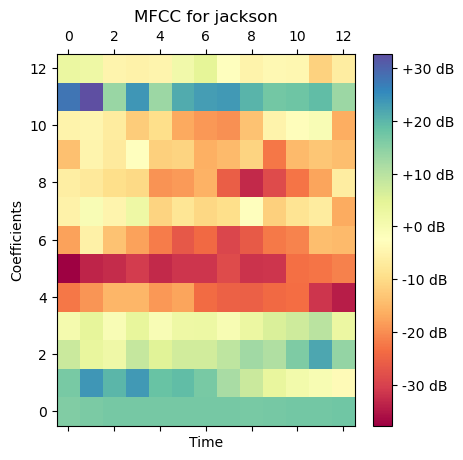

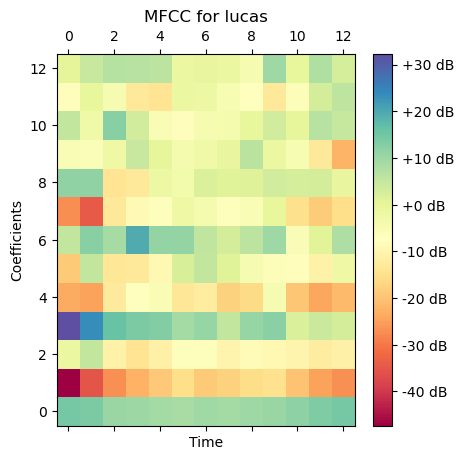

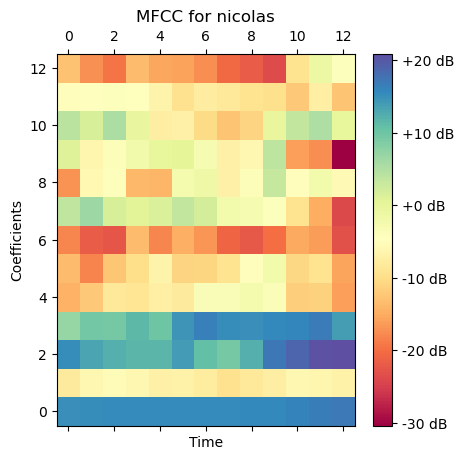

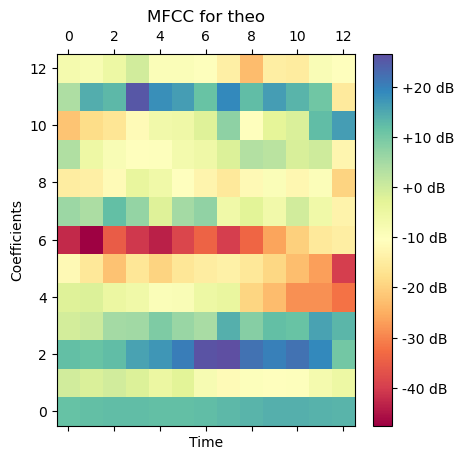

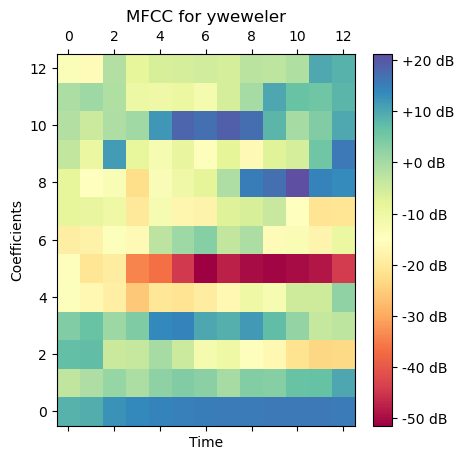

In [5]:
for speaker in speakers:
    view_mfcc_plots(file_speaker_mfcc_vals[speaker], speaker)
        

### Q3: MFCCs robustness and its' sensibility towards change in voice signals:
**Noise Robustness**: MFCCs exhibit relative resilience to background noise and other forms of interference. This robustness stems from their derivation from the logarithmic spectrum of the audio signal, which accentuates crucial spectral features while attenuating less relevant components.

**Temporal Robustness**: MFCCs capture both short-term and long-term spectral characteristics of audio signals, rendering them suitable for analyzing signals with temporal variations. They remain robust even when faced with slight variations in signal duration and temporal alignment, which proves advantageous for tasks involving continuous speech or music signals.

**Frequency Sensitivity**: MFCCs demonstrate sensitivity to changes in the frequency content of audio signals, particularly in critical frequency regions essential for human perception. They accurately capture variations in pitch, formants, and other spectral features related to the timbre and identity of sound sources.

**Dynamic Sensitivity**: MFCCs respond to dynamic changes in the spectral envelope of audio signals, such as transitions between different phonemes in speech or alterations in musical articulation. Their ability to capture rapid spectral changes provides valuable insights into the dynamics of sound production and perception.

**Parameter Sensitivity**: The effectiveness of MFCCs can be influenced by various parameters, including the number of filterbanks, the size of the analysis window, and the number of cepstral coefficients. Achieving optimal performance across different types of sound signals and applications necessitates careful tuning of these parameters.

### Q4: Scenarios that MFCC may exibit less performance:
**Non-Stationary Signals**:
MFCCs assume that the audio signal remains stationary within short analysis frames. However, when dealing with rapidly changing or non-stationary signals (e.g., those containing rapid pitch variations or transient sounds), MFCCs might struggle to accurately capture dynamic spectral characteristics. In such cases, alternative features or time-frequency representations may be more suitable.

**Nonlinear Distortions**:
The computation of MFCCs relies on linear operations like the Discrete Fourier Transform (DFT) and Discrete Cosine Transform (DCT). When an audio signal undergoes nonlinear distortions (e.g., clipping, saturation, or compression artifacts), MFCCs may not adequately represent the distorted spectral content. Other feature extraction methods that account for nonlinearities could be more robust.

**Low Signal-to-Noise Ratio (SNR)**:
In environments with low SNR (where noise is prominent), MFCC estimation quality can suffer. Noise interferes with important spectral features, diminishing the discriminative power of MFCCs. For tasks like speech recognition or speaker identification, denoising techniques or alternative features may yield better results.

**Limited Frequency Resolution**:
MFCCs rely on a fixed number of Mel filterbanks to approximate the human auditory system’s frequency resolution. While they work well for many applications, situations requiring fine frequency details or high-frequency components (e.g., distinguishing similar phonemes or identifying musical instruments) may challenge MFCCs due to their limited frequency resolution. Customizing the filterbank design or exploring alternative features could address this limitation.

### Q5:
Leveraging overlapping frames in MFCC extraction proves beneficial for capturing temporal changes in the audio signal, mitigating variability, and generating a more fluid representation suitable for various audio analysis tasks.

### Q6:

The first MFCCs often capture the most important features related to the audio’s spectral shape and energy distribution. Using fewer frames reduces the feature size, which is good for computational efficiency. Focusing on the first 12 or 13 MFCCs allows us to gather important information while avoiding repetition. Studies show that humans are more sensitive to lower-order MFCCs, so this approach is especially useful for extracting detailed information.

## Getting to Know HMM


### Q1: What are states and observations in this project:
**States**: Unobservable or hidden values of the sytem

**Observations**: Observable variables or the evidence

Here the states are the speakers, 'george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler'.
The observations are obtained by the audio signals. the process of obtaining observations involves extracting relevant features from the audio signal. here we are using MFCC for retrieving the features.

### Q2: First Order HMM:
**Definition**:

The key idea is that there exists an observable process whose outcomes are influenced by the outcomes of the hidden process in a known way.
The hidden process (often denoted as Z) evolves over time, and its states are not directly observable. Instead, we observe another process (denoted as X), which depends on the hidden states of Z.

The goal is to learn about the hidden state sequence Z by observing the sequence of observations X.

First-Order Markov Assumption:
**In a first-order HMM**:
The probability of an event at time t depends solely on the observation at time t-1 (not on events before t-1).
The observations O1, O2, …, Ot-1 do not impact the observation at time Ot.
Essentially, the hidden state transitions follow a Markov property, where the current state depends exclusively on the previous state.

**Why is it named "First Order HMM" afterall?** The term **“order”** in HMMs refers to the level of dependency between consecutive hidden states.
A first-order HMM (also known as a first-order Markov model) assumes that the probability of transitioning from one hidden state to another depends only on the current state.


### Q3: What kinds of models are suitable to be trained with HMM?

1. Speech Recognition:
HMMs are widely used for automatic speech recognition (ASR).
They model the probabilistic relationship between phonemes, words, or sentences and the corresponding acoustic features (e.g., Mel-Frequency Cepstral Coefficients).
The Viterbi algorithm helps find the most likely sequence of hidden states (phonemes or words) given the observed acoustic features1.

2. Part-of-Speech (POS) Tagging:
HMMs are effective for POS tagging in natural language processing (NLP).
They map observed words to hidden POS tags (states) based on the underlying grammatical structure.
The Viterbi algorithm infers the most likely sequence of POS tags given the observed words.

3. Bioinformatics:
HMMs are used for sequence analysis in genomics and proteomics.
They model DNA, RNA, or protein sequences and predict hidden states (e.g., gene regions, secondary structures) based on observed sequences.
Applications include gene prediction, motif finding, and protein family classification.

4. Finance and Economics:
HMMs model financial time series data (e.g., stock prices, exchange rates).
They capture hidden market states (bullish, bearish) and predict future states based on observed historical data.
Applications include portfolio optimization, risk assessment, and algorithmic trading.

5. Gesture Recognition:
HMMs analyze motion data (e.g., hand gestures, body movements).
They map observed motion sequences to hidden gesture states.
Applications include sign language recognition and human-computer interaction.

6. Dynamic Systems Modeling:
HMMs are useful for modeling dynamic systems with hidden states.
They predict future states based on observed sequences.
Applications include weather forecasting, ecological modeling, and robotics.

7. Multiple Observed Variables:
Extended HMM variants (e.g., Dynamic Naive Bayes classifiers) handle multi-observation scenarios, where multiple variables are observed simultaneously2.
These models cater to situations with complex dependencies among observed variables.

8. Biological Sequences with Partial Labels:
Modified training methods for HMMs leverage partial labels in biological sequence data to improve model performance3.
These adaptations enhance the training process.

### Q4: Pros and Cons of HMM Model

**Advantages of HMM**: 

1. Sequential Data Modeling:
HMMs excel at modeling sequential data, making them suitable for various tasks involving time-dependent observations.
Applications include speech recognition, natural language processing (NLP), and bioinformatics1.

2. Interpretable States and Transitions:
HMMs provide interpretable states and transitions.
Understanding the model’s behavior aids in explaining predictions and decision-making.

3. Scalability:
HMMs efficiently handle large datasets.
Their computational complexity remains manageable even with substantial amounts of data.


**Disadvantages of HMM**:

1. Markovian Assumption:
HMMs assume Markovian dynamics, meaning that the future state depends only on the current state.
This assumption may not hold in all real-world scenarios, limiting the model’s flexibility2.

2. Sensitivity to Initialization Parameters:
HMMs’ performance can be sensitive to the choice of initial parameters (e.g., initial state probabilities, transition probabilities).
Proper initialization is crucial for accurate results.

3. Limited Representation of Long-Term Dependencies:
First-order HMMs (with only one-step dependencies) cannot fully capture long-term dependencies.
For more complex relationships, higher-order HMMs or alternative models may be necessary3.

4. Complexity of Unstructured Parameters:
HMMs often involve a large number of unstructured parameters.
Balancing model complexity and overfitting requires careful consideration.

5. Protein Structure Representation Limitations:
While HMMs are used in bioinformatics, they do not fully represent complex protein 3D structures.
Other methods are needed for detailed structural analysis

### Q5: Different Kinds of HMM Algorithm:

1. **Left-Right**:  A type of HMM where the states are organized in a left-to-right structure, meaning transitions can only occur from left to right. This structure is commonly used in speech recognition.

2. **Continuous**: Used when the observations emitted from the hidden states are continuous rather than discrete. This is common in applications like speech and gesture recognition.

3. **Mixture**: Combines multiple HMMs to form a mixture model. Each component HMM in the mixture represents a different mode of the system, and the model can switch between these modes.

4. **Factorial**: Introduces a factorial structure in the emission probabilities, allowing dependencies between different elements of the observation vector.

# HMMLEARN Librarries

## Data Split

In [6]:
speaker_test_x = []
speaker_test_y = []
TEST_SIZE = 0.2
speaker_lables = list(file_speaker_mfcc_vals.keys())
for i in range(len(speakers)):
    speaker = speakers[i]
    x_train, x_test, y_train, y_test = train_test_split(np.array(file_speaker_mfcc_vals[speaker]), np.full(len(file_speaker_mfcc_vals[speaker]), i ), test_size = TEST_SIZE)
    file_speaker_mfcc_vals[speakers[i]] = x_train.reshape((x_train.shape[0] * x_train.shape[1], x_train.shape[2]))
    speaker_test_x.append(list(x_test))
    speaker_test_y.append(y_test)

speaker_test_x = np.array(speaker_test_x)
speaker_test_x = speaker_test_x.reshape((speaker_test_x.shape[0] * speaker_test_x.shape[1], speaker_test_x.shape[2], speaker_test_x.shape[3]))
speaker_test_y = np.array(speaker_test_y).flatten()

In [7]:
speaker_hmm_model = []
library_pred = []
true = 0
total = 0
false_positives_s = 0 
for speaker in speakers:
    model = hmm.GaussianHMM(n_components = 6, covariance_type = 'diag')
    model.fit(file_speaker_mfcc_vals[speaker])
    speaker_hmm_model.append(model)

for i in range(speaker_test_x.shape[0]):
    scores = []
    for model in speaker_hmm_model:
        scores.append(model.score(speaker_test_x[i,:]))
    lable = np.argmax(np.array(scores))
    library_pred.append(lable)
    if lable == speaker_test_y[i]:
        true = true +1
    elif lable != speaker_test_y[i]:
        false_positives_s = false_positives_s + 1
    total = total + 1    
    

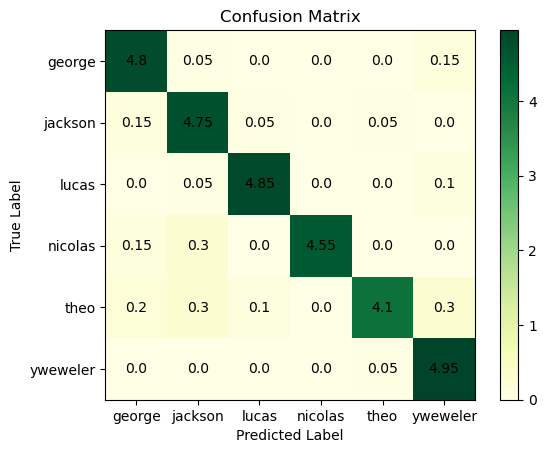

In [8]:
def plot_conf_matrix(conf_matrix, class_labels):

    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.YlGn)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(class_labels)), class_labels)
    plt.yticks(np.arange(len(class_labels)), class_labels)
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
matrix = metrics.confusion_matrix(speaker_test_y, np.array(library_pred))/20
plot_conf_matrix(matrix, speakers)

In [9]:
data_test_x = []
data_test_y = []
nums_lables = list(file_number_mfcc_vals.keys())
for i in range(len(numbers)):
    x_train, x_test, y_train, y_test = train_test_split(np.array(file_number_mfcc_vals[i]), np.full(len(file_number_mfcc_vals[i]),i ), test_size = TEST_SIZE)
    file_number_mfcc_vals[numbers[i]] = x_train.reshape((x_train.shape[0] * x_train.shape[1], x_train.shape[2]))
    data_test_x.append(list(x_test))
    data_test_y.append(y_test)

data_test_x = np.array(data_test_x)
data_test_x = data_test_x.reshape((data_test_x.shape[0] * data_test_x.shape[1], data_test_x.shape[2], data_test_x.shape[3]))
data_test_y = np.array(data_test_y).flatten()

In [10]:
num_hmm_model = []
library_y_predictions=[]
true_values = 0
total_values = 0
false_positives = 0
for digit in numbers:
    model = hmm.GaussianHMM(n_components=10, covariance_type='diag')
    model.fit(file_number_mfcc_vals[digit])
    num_hmm_model.append(model)

for i in range(data_test_x.shape[0]):
    scores=[]
    for model in num_hmm_model : 
        scores.append(model.score(data_test_x[i,:]))
    label = np.argmax(np.array(scores))
    library_y_predictions.append(label)
    
    if label == data_test_y[i]:
        true_values = true_values +1
    elif label != data_test_y[i]:
        false_positives += 1
    total_values = total_values + 1 

c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\AsusIran\anaconda3\envs\envname\Lib\site-packages\sklearn\cluster\_kmeans.py

In [11]:
def plot_conf_matrix(conf_matrix, class_labels):

    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.YlGn)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(class_labels)), class_labels)
    plt.yticks(np.arange(len(class_labels)), class_labels)
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

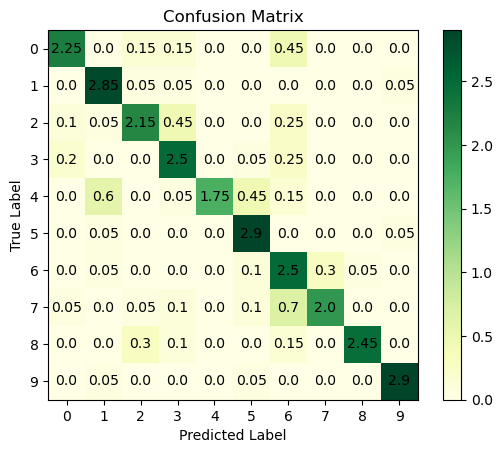

In [12]:
matrix = metrics.confusion_matrix(data_test_y, np.array(library_y_predictions))/20
plot_conf_matrix(matrix, numbers)

## Calculate Accuracy, Precision

In [13]:
def calc_accuracy(true_values, total_values):
    return true_values / total_values
    
def calc_precision(true_pos, false_pos):
    return true_pos / (true_pos + false_pos)

In [14]:
acc_score_speakers = calc_accuracy(true, total)
acc_score_numbers = calc_accuracy(true_values, total_values)

pres_score_numbers = calc_precision(true_values, false_positives)
pres_score_speakers = calc_precision(true, false_positives_s)

print("Accuracy for speakers: ", acc_score_speakers)
print("Accuracy for numbers: ", acc_score_numbers)

print("Precision for speakers: ", pres_score_speakers)
print("Precision for numbers: ", pres_score_numbers)


Accuracy for speakers:  0.9333333333333333
Accuracy for numbers:  0.8083333333333333
Precision for speakers:  0.9333333333333333
Precision for numbers:  0.8083333333333333


## Implementing from Scratch

In [15]:
from scipy.stats import multivariate_normal

class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None


    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:,0] =  self.initial_prob[:,0] * observation_matrix[:,0]
            else:
                alpha[:,t] = observation_matrix[:,t] * np.matmul(self.transition_matrix.T, alpha[:,t-1])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha


    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)
        beta[:, -1] = np.ones(observation_matrix.shape[0])
        for t in range(T - 1)[::-1]:
            beta[:, t] = np.matmul(self.transition_matrix, (observation_matrix[:,t+1] * beta[:,t+1]))
            beta[:, t] /= np.sum(beta[:, t])
        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))
        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs.T,mean =self.mean[:,s],cov = self.covariances[:,:,s])
        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]
        B = self._state_likelihood(obs=obs)
        
        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = sum(alpha[:,t] * beta[:,t+1] * B[:,t+1]) * self.transition_matrix
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:,t] * beta[:,t]
            gamma[:, t] = self._normalize(partial_g)
            
        partial_g = alpha[:,T-1] * beta[:,T-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = np.reshape(gamma[:, 0],(-1,1))
        expected_transition = self._stochasticize(xi_sum/np.sum(xi_sum,axis=(0,1)))

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [16]:
speaker_HMM_models = []
true_speakers = 0
total_speakers = 0
fp_model_s = 0
for label in speakers:
    model = HMM(num_hidden_states=6)
    model.train(file_speaker_mfcc_vals[label].T/np.amax(file_speaker_mfcc_vals[label].T),num_iterations=2)
    speaker_HMM_models.append(model)

y_preds_scratch=[]
for i in range(speaker_test_x.shape[0]):
    scores=[]
    for model in speaker_HMM_models:
        scores.append(model.score(speaker_test_x[i,:].T/np.amax(speaker_test_x[i,:].T)))
    label = np.argmax(np.array(scores))
    y_preds_scratch.append(label)
    
    if label == speaker_test_y[i]:
        true_speakers = true_speakers + 1
    elif label != speaker_test_y[i]:
        fp_model_s = fp_model_s + 1
    total_speakers = total_speakers + 1

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_19532\2933103137.py:28: RuntimeWarning: invalid value encountered in divide
  alpha[:, t] /= alpha_sum
C:\Users\AsusIran\AppData\Local\Temp\ipykernel_19532\2933103137.py:29: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(alpha_sum)


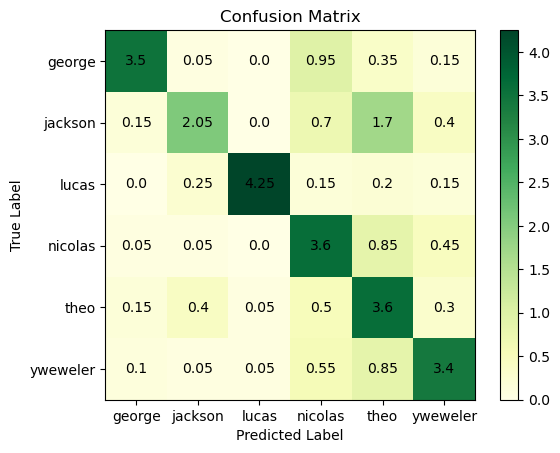

In [17]:
matrix = metrics.confusion_matrix(speaker_test_y, np.array(y_preds_scratch))/20
plot_conf_matrix(matrix, speakers)

In [18]:
num_HMM_models = []
true_nums = 0
total_nums = 0
fp_model_n = 0
for label in numbers:
    model = HMM(num_hidden_states=6)
    model.train(file_number_mfcc_vals[label].T/np.amax(file_number_mfcc_vals[label].T),num_iterations=2)
    num_HMM_models.append(model)

y_preds_scratch_n=[]
for i in range(data_test_x.shape[0]):
    scores=[]
    for model in num_HMM_models:
        scores.append(model.score(data_test_x[i,:].T/np.amax(data_test_x[i,:].T)))
    label = np.argmax(np.array(scores))
    y_preds_scratch_n.append(label)
    
    if label == data_test_y[i]:
        true_nums = true_nums + 1
    elif label != data_test_y[i]:
        fp_model_n = fp_model_n + 1
    total_nums = total_nums + 1

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_19532\2933103137.py:28: RuntimeWarning: invalid value encountered in divide
  alpha[:, t] /= alpha_sum
C:\Users\AsusIran\AppData\Local\Temp\ipykernel_19532\2933103137.py:29: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(alpha_sum)


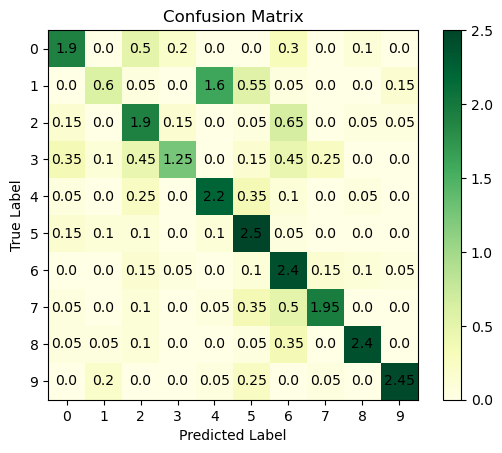

In [19]:
matrix = metrics.confusion_matrix(data_test_y, np.array(y_preds_scratch_n))/20
plot_conf_matrix(matrix, numbers)

In [20]:
acc_score_speakers_scr = calc_accuracy(true_speakers, total_speakers)
acc_score_numbers_scr = calc_accuracy(true_nums, total_nums)

pres_score_speakers_scr = calc_precision(true_speakers, fp_model_s)
pres_score_numbers_scr = calc_precision(true_nums, fp_model_n)

print("Accuracy score for speakers from scratch:", acc_score_speakers_scr)
print("Accuracy score for numbers from scratch:", acc_score_numbers_scr)

print("Precision score for speakers from scratch:", pres_score_speakers_scr)
print("Precision score for numbers from scratch:", pres_score_numbers_scr)


Accuracy score for speakers from scratch: 0.68
Accuracy score for numbers from scratch: 0.6516666666666666
Precision score for speakers from scratch: 0.68
Precision score for numbers from scratch: 0.6516666666666666


## Data Analysis

### Q1 and Q3

#### Precision:
Precision measures the **quality** of a classification system.
It answers the question: “Out of all the instances predicted as positive, how many are truly relevant?”

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

#### Recall:
Focuses on the quantity of relevant instances captured by the system.
It answers the question: “Out of all the actual positive instances, how many did we manage to retrieve?”

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

#### F1 Score:
The F1 score (also known as the F-measure) combines both precision and recall into a single metric.

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

#### Accuracy:
Accuracy measures how often a model’s predictions are correct.
It answers the question: “What fraction of predictions did our model get right?”

$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Number of Samples}}$

### Q2 :Challenges of Precision, Recall, Accuracy and F1 Score with projects that are multi-class:
In multi-class projects, the evaluation metrics of Precision, Recall, Accuracy, and F1 Score can present several challenges:

**Imbalanced Classes**: Accuracy can be misleading in situations with imbalanced classes1. For instance, if one class has significantly more samples than another, a model might achieve high accuracy by simply predicting the majority class. In such cases, Precision, Recall, or F1 Score might be more informative2.

**Multi-Label Classification**: In multi-label classification, where an instance can belong to multiple classes, traditional definitions of these metrics can be inadequate3. For example, accuracy is often computed based on exact matches of the predicted and true label sets, which can be overly strict3.

**Trade-off between Precision and Recall**: There is often a trade-off between Precision (how many selected instances are relevant) and Recall (how many relevant instances are selected). In some cases, you might want to prioritize one over the other depending on the application. The F1 Score seeks a balance between these two metrics4.

**Macro vs Micro Averaging**: When calculating these metrics, you need to decide whether to use macro-averaging (calculate metrics for each class and then take the average) or micro-averaging (aggregate the contributions of all classes to compute the average). This choice can significantly impact the resulting values4.

**Interpretability**: While these metrics provide a quantitative measure of model performance, they may not always align with intuitive or business understandings of “good” performance



### Q4:
Allow me to explain the difference between precision and recall with an example. 
Assume we have a bowl of rice. Combined with the rice, there are some stones.
The task is to seperate the rice from the stones.

**Precision**: If you claim a grain is a stone, how often are you correct? High precision means you rarely mislabel rice grains as stones.

**Recall**: How many of the actual stones did you manage to find? High recall means you rarely miss any stones.

*Balancing precision and recall is crucial. If you’re too cautious (high precision), you might miss some stones. If you’re too aggressive (high recall), you might include more rice grains as stones.*


### Q5: What kind of *mean* is used in calculating F1 Score?

The harmonic mean is used instead of the arithmetic mean to calculate the F1 score because it punishes extreme values. In other words, to get a high F1 score, both precision and recall must be high. If either precision or recall is low, the F1 score will also be low, even if the other metric is high.

The arithmetic mean and the harmonic mean are both types of averages, but they are calculated differently and used in different situations.

The arithmetic mean is calculated by summing a series of numbers and dividing by the count of numbers in that series. It is appropriate if the values have the same units.

On the other hand, the harmonic mean is calculated by dividing the number of observations by the reciprocal of each number in the series. It is appropriate if the data values are ratios of two variables with different measures, called rates.

The importance of using the harmonic mean in the F1 score lies in its property of giving more weight to lower values. This means that if either precision or recall is low, the F1 score will also be low, even if the other metric is high. This property makes the F1 score a robust measure that only gives high scores to models that perform well in both precision and recall.

### Q6, Q7, Q8
As you can see, the accuracy for both {speakers and numbers} decrease when we use HMM model built from scratch. However, when we use the predefined hmmlibrary, we get a much higher accuracy rate. Also, the same thing applies for calculating precision with both methods. The plots and accuracies and precisions can be viewed in output of the above cells. 